In [3]:
import pandas as pd

# Remplace 'nom_du_fichier.csv' par le chemin réel de ton fichier CSV
chemin_fichier = 'flickr_data2.csv'

# Lecture du fichier CSV
try:
    data = pd.read_csv(chemin_fichier, sep=',')
    print("Fichier importé avec succès !")
except Exception as e:
    print(f"Une erreur est survenue : {e}")

Fichier importé avec succès !


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_12877/2091030073.py:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(chemin_fichier, sep=',')


In [4]:
print("### Informations générales sur le dataset ###")
print(data.info())

# Nombre total de lignes et colonnes
print("\nNombre total de lignes et colonnes :")
print(f"Lignes : {data.shape[0]}, Colonnes : {data.shape[1]}")

# Statistiques descriptives
print("\n### Statistiques descriptives ###")
#print(data.describe(include='all'))  # Inclut toutes les colonnes

# Comptage des valeurs nulles par colonne
print("\n### Nombre de valeurs nulles par colonne ###")
print(data.isnull().sum())

# Pourcentage de valeurs nulles
print("\n### Pourcentage de valeurs nulles par colonne ###")
print((data.isnull().sum() / data.shape[0]) * 100)

# Détection des doublons
print("\n### Nombre de doublons ###")
print(data.duplicated().sum())

# Aperçu des premières lignes
print("\n### Aperçu des premières lignes ###")
print(data.head())


### Informations générales sur le dataset ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420240 entries, 0 to 420239
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   420240 non-null  int64  
 1    user                420240 non-null  object 
 2    lat                 420240 non-null  float64
 3    long                420240 non-null  float64
 4    tags                316730 non-null  object 
 5    title               381911 non-null  object 
 6    date_taken_minute   420239 non-null  float64
 7    date_taken_hour     420240 non-null  int64  
 8    date_taken_day      420240 non-null  int64  
 9    date_taken_month    420240 non-null  int64  
 10   date_taken_year     420240 non-null  int64  
 11   date_upload_minute  420228 non-null  object 
 12   date_upload_hour    420238 non-null  object 
 13   date_upload_day     420238 non-null  float64
 14   date_upload_month   4

In [5]:

try:
    # Suppression des doublons sur toutes les colonnes
    data_sans_doublons = data.drop_duplicates()
    print("Les doublons ont été supprimés du dataset.")

    # Identifier les 3 dernières colonnes
    dernieres_colonnes = data_sans_doublons.columns[-3:]  # Noms des 3 dernières colonnes
    print("### Les 3 dernières colonnes identifiées sont : ###")
    print(dernieres_colonnes)

    # Filtrer les lignes où au moins une des 3 dernières colonnes contient une valeur non nulle
    lignes_problemes = data_sans_doublons[dernieres_colonnes].notnull().any(axis=1)

    lignes_problemes_df = data_sans_doublons[lignes_problemes]

    lignes_problemes_df['title_date_concat'] = (
    lignes_problemes_df[' title'].astype(str) + '_:' + lignes_problemes_df[' date_upload_minute'].astype(str)
    )
    # Réassigner les colonnes en utilisant .loc
    lignes_problemes_df.loc[:, ' date_upload_minute'] = lignes_problemes_df[' date_upload_hour']
    lignes_problemes_df.loc[:, ' date_upload_hour'] = lignes_problemes_df[' date_upload_day']
    lignes_problemes_df.loc[:, ' date_upload_day'] = lignes_problemes_df[' date_upload_month']
    lignes_problemes_df.loc[:, ' date_upload_month'] = lignes_problemes_df[' date_upload_year']
    lignes_problemes_df.loc[:, ' date_upload_year'] = lignes_problemes_df['Unnamed: 16']
    lignes_problemes_df.loc[:, ' title'] = lignes_problemes_df['title_date_concat']

    lignes_problemes_df['annee'] = lignes_problemes_df[' date_taken_minute']
    lignes_problemes_df.loc[:, ' date_taken_minute'] = lignes_problemes_df[' date_taken_hour']
    lignes_problemes_df.loc[:,' date_taken_hour'] = lignes_problemes_df[' date_taken_day']
    lignes_problemes_df.loc[:,' date_taken_day'] = lignes_problemes_df[' date_taken_month']
    lignes_problemes_df.loc[:,' date_taken_month'] = lignes_problemes_df[' date_taken_year']
    lignes_problemes_df.loc[:,' date_taken_year'] = lignes_problemes_df['annee']

    lignes_problemes_df.drop(columns=['annee', 'title_date_concat', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)

    # Liste des IDs à supprimer
    ids_a_supprimer = [8744184885, 8715425964]

    # Suppression des lignes correspondant aux IDs spécifiés
    lignes_problemes_df = lignes_problemes_df[~lignes_problemes_df['id'].isin(ids_a_supprimer)]

except Exception as e:
    print(f"Une erreur est survenue : {e}")


Les doublons ont été supprimés du dataset.
### Les 3 dernières colonnes identifiées sont : ###
Index(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18'], dtype='object')


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_12877/2207322591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lignes_problemes_df['title_date_concat'] = (
/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_12877/2207322591.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lignes_problemes_df['annee'] = lignes_problemes_df[' date_taken_minute']
/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_12877/2207322591.py:34: SettingWithCopyWarning: 
A value is trying to be set 

In [6]:
ids_problemes = lignes_problemes_df['id'].tolist()  # Liste des IDs corrigés
df_base = data_sans_doublons[~data_sans_doublons['id'].isin(ids_problemes)]
df_base.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)
# Ajouter les lignes corrigées au DataFrame de base
df_base = pd.concat([df_base, lignes_problemes_df], ignore_index=True)


/var/folders/r2/gpm53c192dsgzq8bxk_h_nph0000gn/T/ipykernel_12877/1733496353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.drop(columns=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18' ], inplace=True)


In [7]:
print(df_base.columns)

Index(['id', ' user', ' lat', ' long', ' tags', ' title', ' date_taken_minute',
       ' date_taken_hour', ' date_taken_day', ' date_taken_month',
       ' date_taken_year', ' date_upload_minute', ' date_upload_hour',
       ' date_upload_day', ' date_upload_month', ' date_upload_year'],
      dtype='object')


In [8]:
df_troncate = df_base.iloc[:, :4]

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np

# Garder seulement les 4 premières colonnes
df_troncate = df_base.iloc[:, :4]

# Vérification des colonnes conservées
print("### Aperçu du DataFrame réduit aux 4 premières colonnes : ###")
print(df_troncate.head())

# Préparation des données pour la clusterisation (Latitude et Longitude)
coords = df_troncate[[' lat', ' long']].to_numpy()

### Aperçu du DataFrame réduit aux 4 premières colonnes : ###
           id          user        lat      long
0  4395181099  30624617@N03  45.754858  4.821710
1  4394748717  35853470@N00  45.753270  4.862953
2  4394694699  11817998@N05  45.760655  4.846564
3  4394803790  11545749@N06  45.784000  4.874072
4  4394803554  11545749@N06  45.784000  4.874072


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


# Charger les données nettoyées
def load_cleaned_data(file_path):
    try:
        data = pd.read_csv(file_path, nrows=10000)
        print(f"Loaded data with {data.shape[0]} rows and {data.shape[1]} columns.")
        return data
    except Exception as e:
        print(f"Error loading cleaned data: {e}")
        return None


# Appliquer DBSCAN
def perform_dbscan_analysis(data, eps, min_samples):
    features = data[[" lat", " long"]]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(features)
    data["cluster"] = labels

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Nombre de clusters détectés : {n_clusters}")
    print(f"Nombre de points isolés (bruit) : {n_noise}")

    return data


# Récursivement subdiviser le plus grand cluster
def subdivide_largest_cluster(data, eps, min_samples):
    largest_cluster = data[data["cluster"] != -1]["cluster"].value_counts().idxmax()
    print(f"Subdivising cluster {largest_cluster}...")

    largest_cluster_points = data[data["cluster"] == largest_cluster]

    # Apply DBSCAN to the largest cluster
    refined_cluster_data = perform_dbscan_analysis(
        largest_cluster_points.copy(), eps=eps, min_samples=min_samples
    )

    # Update the cluster IDs to avoid overlap
    max_cluster_id = data["cluster"].max()
    refined_cluster_data["cluster"] = refined_cluster_data["cluster"].apply(
        lambda x: x + max_cluster_id + 1 if x != -1 else -1
    )

    # Merge back refined clusters
    data.loc[data["cluster"] == largest_cluster, "cluster"] = (
        -1
    )  # Mark old cluster as noise
    data = pd.concat([data, refined_cluster_data])

    return data


# Visualiser les clusters avec des couleurs correctes
def plot_clusters_with_matplotlib(data):
    plt.figure(figsize=(10, 8))

    # Map unique cluster IDs to consistent colors
    unique_clusters = sorted(data["cluster"].unique())
    cluster_color_map = {
        cluster: plt.get_cmap("tab20")(idx % 20)
        for idx, cluster in enumerate(unique_clusters)
    }

    for cluster in unique_clusters:
        cluster_points = data[data["cluster"] == cluster]

        # Assign colors to clusters, noise gets black
        color = cluster_color_map[cluster] if cluster != -1 else "black"

        plt.scatter(
            cluster_points[" long"],
            cluster_points[" lat"],
            s=20,
            c=[color],
            label=f"Cluster {cluster}" if cluster != -1 else "Noise",
        )

    plt.title("Visualisation des clusters DBSCAN")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend(loc="best", fontsize="small", bbox_to_anchor=(1.05, 1))
    plt.grid()
    plt.show()


# Remove noise from the data
def remove_noise(data):
    filtered_data = data[data["cluster"] != -1]
    print(f"Data after removing noise: {filtered_data.shape[0]} rows.")
    return filtered_data


# Main function
def main():
    # File paths
    input_file_path = "./data/cleaned_flickr_data.csv"
    output_file_path_clusters = "./data/clustered_flickr_data.csv"
    output_file_path_no_noise = "./data/clustered_flickr_data.csv"

    # Load data
    df = load_cleaned_data(input_file_path)

    if df is not None:
        # Perform initial DBSCAN
        clustered_data = perform_dbscan_analysis(df, eps=0.0061, min_samples=4)

        # Plot initial clusters
        plot_clusters_with_matplotlib(clustered_data)

        # Subdivide the largest clusters
        clustered_data = subdivide_largest_cluster(
            clustered_data, eps=0.001, min_samples=4
        )
        clustered_data = subdivide_largest_cluster(
            clustered_data, eps=0.0006, min_samples=4
        )

        # Plot clusters after subdivision
        plot_clusters_with_matplotlib(clustered_data)

        # Save clustered data
        clustered_data.to_csv(output_file_path_clusters, index=False)
        print(f"Clustered data saved to {output_file_path_clusters}")

        # Remove noise and save
        clustered_data_no_noise = remove_noise(clustered_data)
        clustered_data_no_noise.to_csv(output_file_path_no_noise, index=False)
        print(f"Clustered data without noise saved to {output_file_path_no_noise}")

        # Plot clusters without noise
        plot_clusters_with_matplotlib(clustered_data_no_noise)


Nombre de clusters détectés : 50
Nombre de points isolés (bruit) : 91


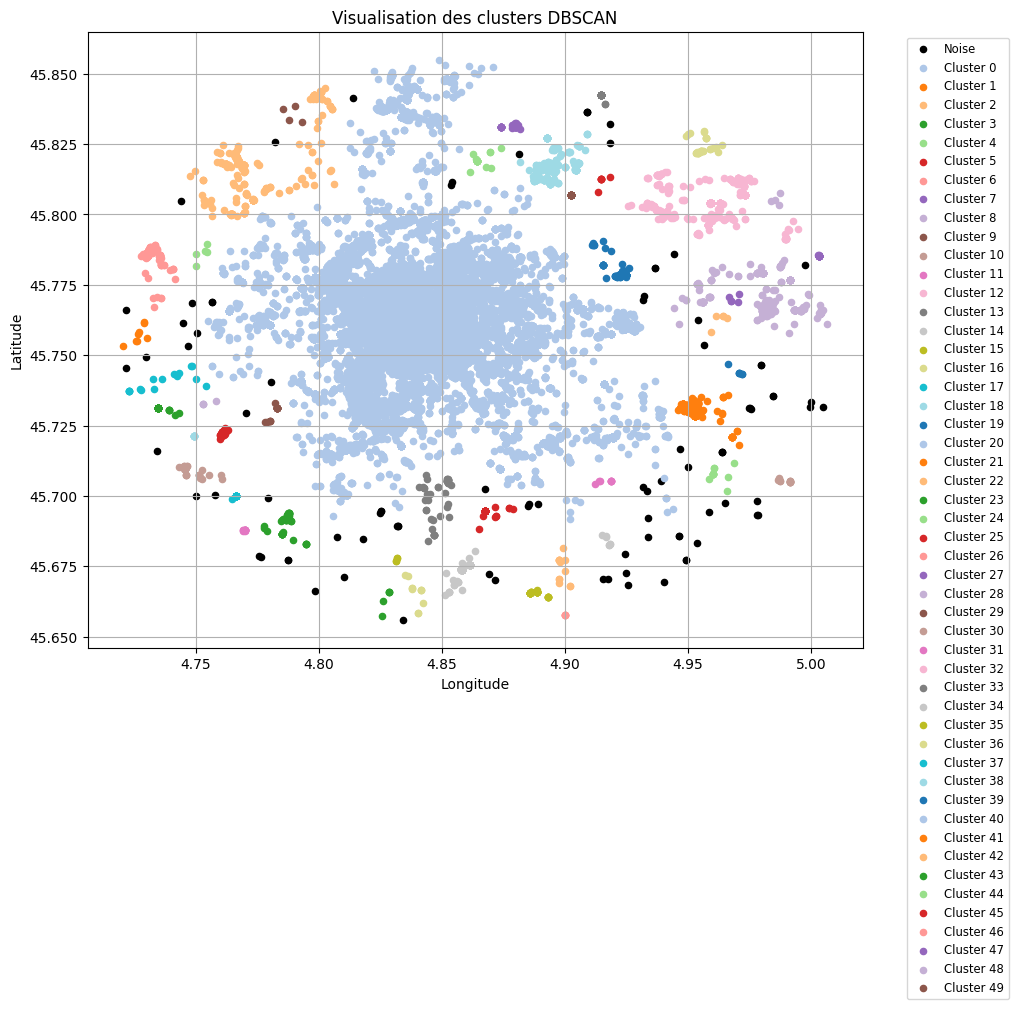

Subdivising cluster 0...
Nombre de clusters détectés : 361
Nombre de points isolés (bruit) : 1103
Subdivising cluster 51...
Nombre de clusters détectés : 157
Nombre de points isolés (bruit) : 442


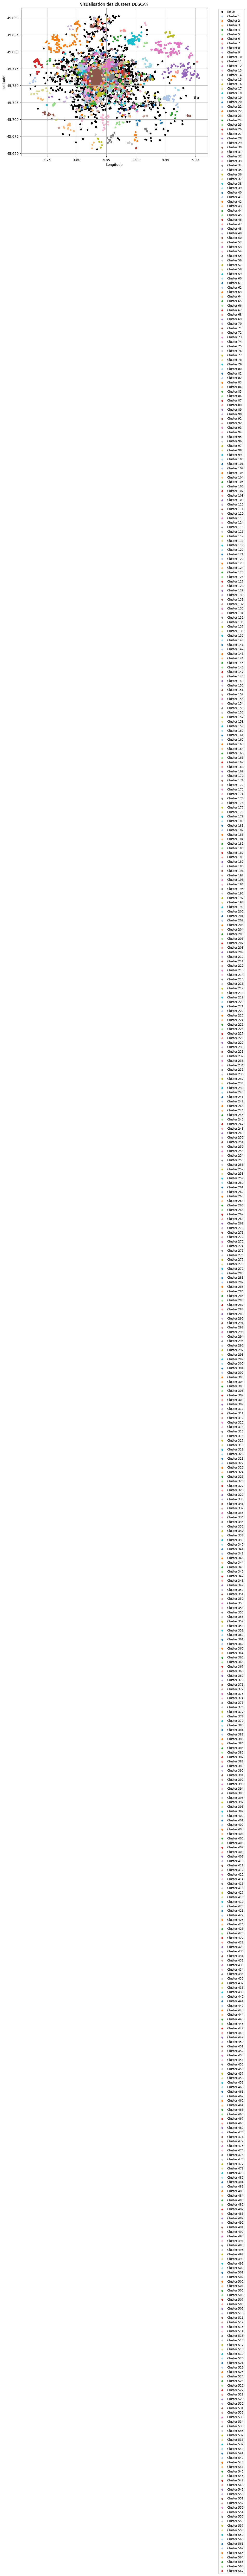

Data after removing noise: 98364 rows.


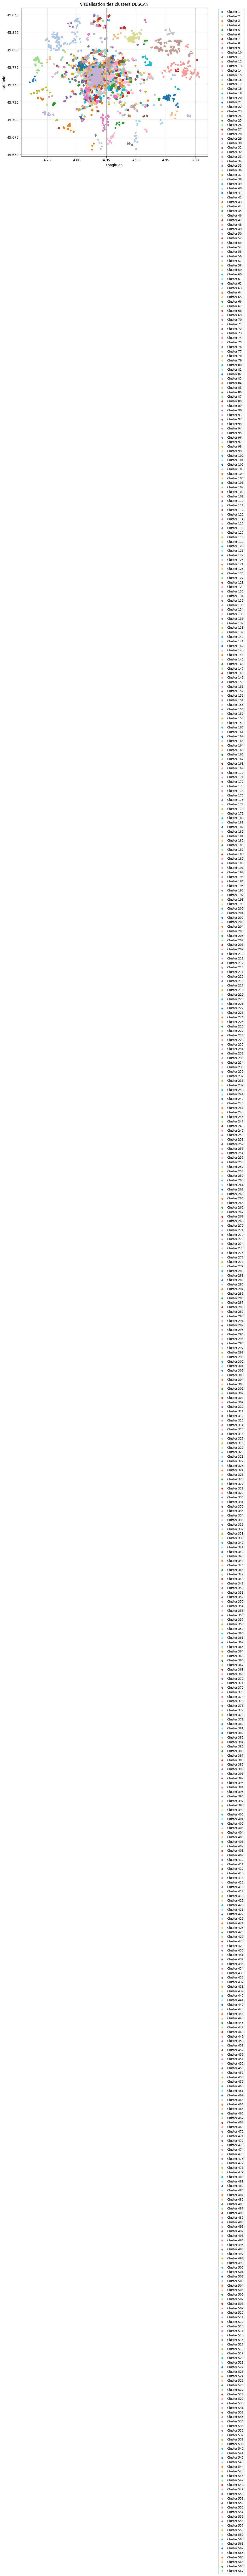

In [16]:
df_sample = df_troncate.sample(n=100000)

if df_sample is not None:
        # Perform initial DBSCAN
        clustered_data = perform_dbscan_analysis(df_sample, eps=0.0061, min_samples=4)

        # Plot initial clusters
        plot_clusters_with_matplotlib(clustered_data)

        # Subdivide the largest clusters
        clustered_data = subdivide_largest_cluster(
            clustered_data, eps=0.001, min_samples=4
        )
        clustered_data = subdivide_largest_cluster(
            clustered_data, eps=0.0006, min_samples=4
        )

        # Plot clusters after subdivision
        plot_clusters_with_matplotlib(clustered_data)

        # Remove noise and save
        clustered_data_no_noise = remove_noise(clustered_data)

        # Plot clusters without noise
        plot_clusters_with_matplotlib(clustered_data_no_noise)

In [14]:
# Statistiques sur les clusters
print("\n### Statistiques des clusters : ###")
clusters_statistiques = sample_df['cluster'].value_counts()

# Affichage formaté des résultats
for cluster_id, count in clusters_statistiques.items():
    print(f"Cluster {cluster_id} a {count} lignes.")



### Statistiques des clusters : ###
Cluster 0 a 10000 lignes.


In [12]:
import folium
from folium.plugins import MarkerCluster


m = folium.Map([45.7640, 4.8357], zoom_start=12)

#Ajouter un marqueur pour chaque donnée non nulle dans les colonnes 'lat' et 'long' des données sans doublons
sampled_data = data_sans_doublons.sample(1000, random_state=42)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(data_sans_doublons[' lat'], data_sans_doublons[' long']):
    folium.Marker(
        location=[lat, long],
        popup=f"Point ({lat}, {long})"
    ).add_to(marker_cluster)


m



KeyboardInterrupt: 